<a href="https://colab.research.google.com/github/jpmarques-97/MachineLearning_study/blob/master/Predicting_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install quandl
!pip install https://github.com/Santosh-Gupta/scikit-learn/archive/master.zip

ERROR: Operation cancelled by user


In [0]:
import pandas as pd, numpy as np, math, quandl, sklearn, datetime
from sklearn import preprocessing,svm
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

## Using the quandl library, we could get a dataset of stocks from google with the 'WIKI/GOOGL'

## I did the authentication to be allowed of unlimited requests

In [0]:

quandl.ApiConfig.api_key = 'bKjTTnfXd1EkcisuxFAN'
df = quandl.get('WIKI/GOOGL')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


## Here we got a lot of extra inforation, but we dont need this for make a simple linear regression, instead using all of this data we get the main data. 
### Open, Close, High, Low and the Volume are the best columns to use.
### And to simplify the model, we use the percent of High an Low([High - Low]/High ) changes, and the percent of Open and Close ([Close - Open]/Close) changes.

In [0]:
df['HL_Percent'] = ((df['High']-df['Close'])/df['Close'])*100.0
df['PCT_Change'] = ((df['Close']-df['Open'])/df['Open'])*100.0
df = df[['Close','HL_Percent','PCT_Change','Volume']]
df.head()

,Close,HL_Percent,PCT_Change,Volume
Date,,,,
2004-08-19,100.335,3.712563,0.324968,44659000.0
2004-08-20,108.310,0.710922,7.227007,22834300.0
2004-08-23,109.400,3.729433,-1.227880,18256100.0
2004-08-24,104.870,6.417469,-5.726357,15247300.0
2004-08-25,106.000,1.886792,1.183658,9188600.0


In [0]:
forecast_col  = 'Close'
df.fillna(-99999,inplace=True)
df['label']   = df[forecast_col].shift(-forecast_out)
df.head()

,Close,HL_Percent,PCT_Change,Volume,label
Date,,,,,
2004-08-19,100.335,3.712563,0.324968,44659000.0,112.00
2004-08-20,108.310,0.710922,7.227007,22834300.0,113.97
2004-08-23,109.400,3.729433,-1.227880,18256100.0,117.49
2004-08-24,104.870,6.417469,-5.726357,15247300.0,119.36
2004-08-25,106.000,1.886792,1.183658,9188600.0,117.84


## Here we added a new column called 'Label', and this will be our output.
## To get future values, we will shift back X days with our data.
## Then we got (first_day) until (last day - x) where x will be the number of days that we will predict with our model

In [0]:
forecast_out  = int(math.ceil(0.05*len(df)))
#number of days that we weill predict
x_predict = X[-forecast_out:]
#getting the last x days into x_predict (this will be our values of input to predict the next X days Close Values)
df.dropna(inplace=True)
#this will drop all the rows with Na values in the Label column (so we get just the data with output)
X = np.array(df.drop(['label'],axis=1))
#adding all the values of inputs into X variable
y = np.array(df['label'])
#adding the correspondent output to train our model with previus data
x_train,x_test,y_train,y_test =  sklearn.model_selection.train_test_split(X,y, test_size=0.2)
#sepaaring our data in train data and test data
clf = LinearRegression()
#create our model
clf.fit(x_train,y_train)
#train our model
accuracy = clf.score(x_test,y_test)
#test our model
print(accuracy)

0.9338609200069581


In [0]:
data_set = clf.predict(x_predict)
#predict the X days left of our data
df['Forecast'] = np.nan
#create a new column in our df
last_date = df.iloc[-1].name
#get the last day
last_unix = last_date.timestamp()
#transform last day in a timestamp
one_day = 86400
# 1 day in seconds
for i in data_set:
  #for each value predicted, add the correspondent day and the predicted value to the DF
  next_unix = last_unix + one_day 
  #find the next day in timestamp
  next_date = datetime.datetime.fromtimestamp(int(next_unix))
  #find the next day in str
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
  #add a new row in DF with Nan value expect for the predict data
  last_unix= next_date.timestamp()
  #get the next day to be our last day and continue the loop correctly

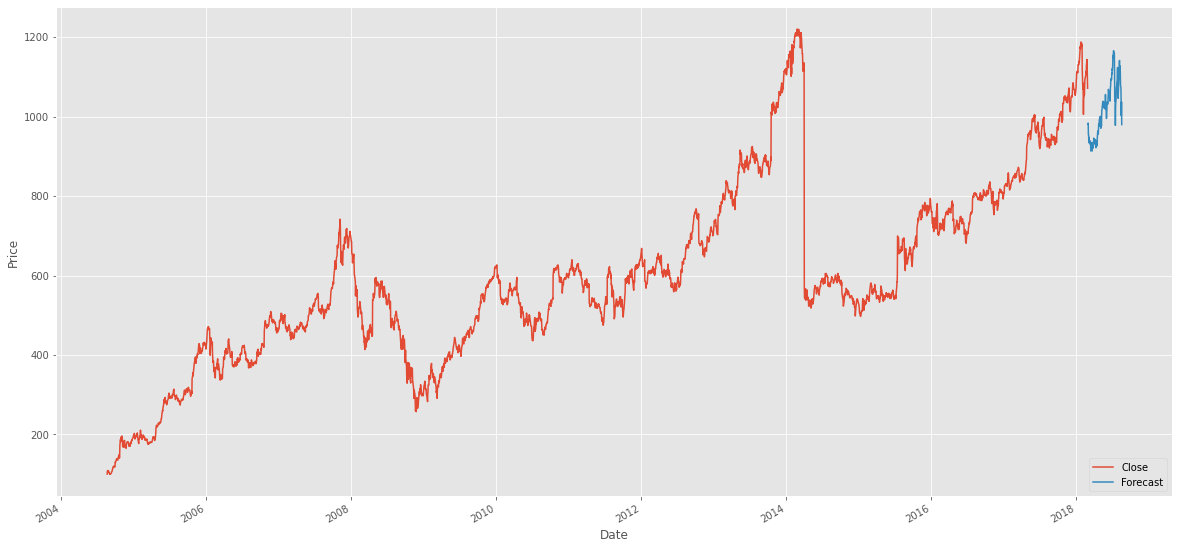

In [0]:
plt.figure(figsize=(20,10))
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()